# Project - Machine Learning : Analyzing NBA Point Guards' Performance with K-means Clustering
A major type of machine learning is called unsupervised learning. In unsupervised learning, we aren't trying to predict anything. Instead, we're finding patterns in data.

One of the main unsupervised learning techniques is called clustering. We use clustering when we're trying to explore a dataset, and understand the connections between the various rows and columns. For example, we can cluster NBA players based on their statistics. Here's how such a clustering might look:

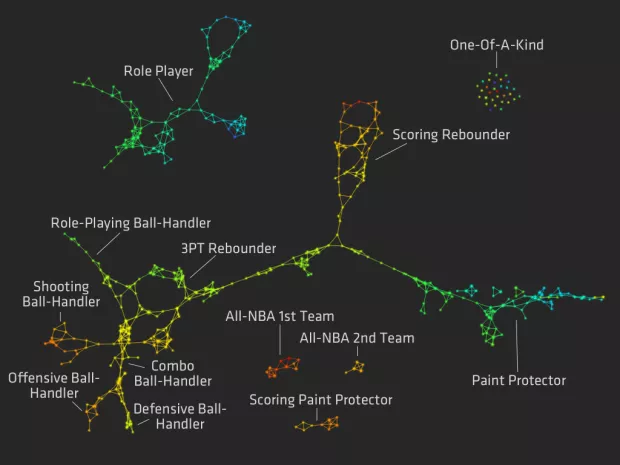

The clusters made it possible to discover player roles that might not have been noticed otherwise. Here's an [article](https://flowingdata.com/2012/03/21/redefining-nba-basketball-positions/) that describes how the clusters were created.

Clustering algorithms group similar rows together. There can be one or more groups in the data, and these groups form the clusters. As we look at the clusters, we can start to better understand the structure of the data.

Clustering is a key way to explore unknown data, and it's a very commonly used machine learning technique. In this project, we'll work on clustering NBA points guards based on their performance metrics.

### Dataset
In NBA media coverage, sports reporters usually focus on a handful of players and paint stories of how unique these players' stats are. With our data science hats on, we can't help but feel a slight sense of skepticism to how different the players are from one another. Let's see how we can use data science to explore that thread further.

Let's look at the dataset of player performance from the 2013-2014 season.

Here are some selected columns:

`player` -- name of the player
`pos` -- the position of the player
`g` -- number of games the player was in
`pts` -- total points the player scored
`fg`. -- field goal percentage
`ft`. -- free throw percentage
Check out the glossary in [Basketball Reference](https://www.basketball-reference.com/leagues/NBA_2014_advanced.html) for an explanation of all the columns

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

In [2]:
nba = pd.read_csv("nba_2013.csv")


In [3]:
nba.head(3)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013


In [4]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

### Point Guards

Point guards play one of the most crucial roles on a team because their primary responsibility is to create scoring opportunities for the team. We are going to focus our lesson on a machine learning technique called clustering, which allows us to visualize the types of point guards as well as group similar point guards together. Using 2 features allows us to easily visualize the players and will also make it easier to grasp how clustering works. For point guards, it's widely accepted that the **Assist to Turnover Ratio** is a good indicator for performance in games as it quantifies the number of scoring opportunities that player created. Let's also use Points Per Game, since effective Point Guards not only set up scoring opportunities but also take a lot of the shots themselves.

**Exercise**

- Create a new Dataframe which contains just the point guards from the data set.
 - Point guards are specified as `PG` in the `pos` column.
 - Assign the filtered data frame to `point_guards`.

In [5]:
point_guards = nba[nba['pos'] == 'PG']

### Points per Game

While our dataset doesn't come with Points Per Game values, we can easily calculate those using each player's total points (pts) and the number of games (g) they played. Let's take advantage of pandas' ability to multiply and divide columns to create the Points Per Game ppg column by dividing the pts and g columns.

In [6]:
point_guards = point_guards.copy() # to avoid copyset warning

point_guards['ppg'] = point_guards['pts'] / point_guards['g']

# Sanity check, make sure ppg = pts/g
point_guards[['pts', 'g', 'ppg']].head(5)

,pts,g,ppg
24,930,71,13.098592
29,150,20,7.500000
30,660,79,8.354430
38,666,72,9.250000
50,378,55,6.872727


### Assist Turnover Ratio
Now let's create a column, atr, for the Assist Turnover Ratio, which is calculated by dividing total assists (ast) by total turnovers (tov):
$$ATR =  \frac{ Assists} {Turnovers}$$

**Exercise**
- Drop the players who have 0 turnovers.
 - Not only did these players only play a few games, making it hard to understand their true abilities, but we also cannot divide by 0 when we calculate `atr`.
- Utilize the same division technique we used with Points Per Game to create the Assist Turnover Ratio (`atr`) column for `point_guards`.

In [7]:
point_guards = point_guards[point_guards['tov'] != 0]
point_guards['atr'] = point_guards['ast'] / point_guards['tov']

### Visualizing point_guards
Use matplotlib to create a scatter plot with Points Per Game (`ppg`) on the X axis and Assist Turnover Ratio (`atr`) on the Y axis.

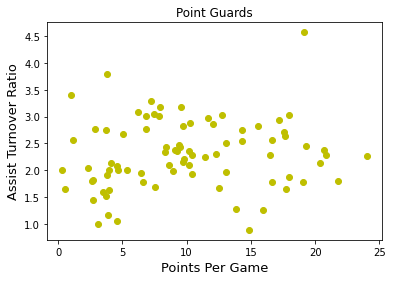

In [8]:
plt.scatter(point_guards['ppg'], point_guards['atr'], c='y')
plt.title("Point Guards")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()

### Clustering Players
There seem to be 5 general regions, or clusters, that the point guards fall into (with a few outliers of course!). We can use a technique called clustering to segment all of the point guards into groups of alike players. While regression and other supervised machine learning techniques work well when we have a clear metric we want to optimize for and lots of pre-labelled data, we need to instead use unsupervised machine learning techniques to explore the structure within a data set that doesn't have a clear value to optimize.

There are multiple ways of clustering data but here we will focus on centroid based clustering for this lesson. Centroid based clustering works well when the clusters resemble circles with centers (or centroids). The centroid represent the arithmetic mean of all of the data points in that cluster.

K-Means Clustering is a popular centroid-based clustering algorithm that we will use. The K in K-Means refers to the number of clusters we want to segment our data into. The key part with K-Means (and most unsupervised machine learning techniques) is that we have to specify what k is. There are advantages and disadvantages to this, but one advantage is that we can pick the k that makes the most sense for our use case. We'll set k to 5 since we want K-Means to segment our data into 5 clusters.

### Algorithm
Setup K-Means is an iterative algorithm that switches between recalculating the centroid of each cluster and the players that belong to that cluster. To start, select 5 players at random and assign their coordinates as the initial `centroids` of the just created clusters.

**Step 1** (Assign Points to Clusters) For each player, calculate the Euclidean distance between that player's coordinates, or values for `atr` & `ppg`, and each of the centroids' coordinates. Assign the player to the cluster whose centroid is the closest to, or has the lowest Euclidean distance to, the player's values.

**Step 2** (Update New Centroids of the Clusters) For each cluster, compute the new centroid by calculating the arithmetic mean of all of the points (players) in that cluster. We calculate the arithmetic mean by taking the average of all of the X values (`atr`) and the average of all of the Y values (`ppg`) of the points in that cluster.

Iterate Repeat steps 1 & 2 until the clusters are no longer moving and have converged.



In [9]:
num_clusters = 5
# Use numpy's random function to generate a list, length: num_clusters, of indices
# numpy.random.choice generates a random sample from a given 1-D array
random_initial_points = np.random.choice(point_guards.index, size=num_clusters)
# Use the random indices to create the centroids
centroids = point_guards.loc[random_initial_points]

In [10]:
print(random_initial_points)
centroids

[253  87 136 328  82]


,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end,ppg,atr
253,Brandon Knight,PG,22,MIL,72,69,2400,461,1092,0.422,110,338,0.325444,351,754,0.465517,0.473,259,323,0.802,46,209,255,352,69,17,188,146,1291,2013-2014,2013,17.930556,1.872340
87,Mario Chalmers,PG,27,MIA,73,73,2178,254,560,0.454,87,226,0.384956,167,334,0.500000,0.531,121,163,0.742,41,173,214,357,119,16,162,210,716,2013-2014,2013,9.808219,2.203704
136,Monta Ellis,PG,28,DAL,82,82,3023,576,1278,0.451,69,209,0.330144,507,1069,0.474275,0.478,339,430,0.788,38,257,295,471,141,23,264,197,1560,2013-2014,2013,19.024390,1.784091
328,Jameer Nelson,PG,31,ORL,68,68,2179,294,747,0.394,136,391,0.347826,158,356,0.443820,0.485,96,112,0.857,29,202,231,476,52,5,166,146,820,2013-2014,2013,12.058824,2.867470
82,Isaiah Canaan,PG,22,HOU,22,0,252,31,87,0.356,18,55,0.327273,13,32,0.406250,0.460,21,29,0.724,7,17,24,22,8,4,21,25,101,2013-2014,2013,4.590909,1.047619


### Visualize Centroids
Let's plot the centroids, in addition to the point_guards, so we can see where the randomly chosen centroids started out.

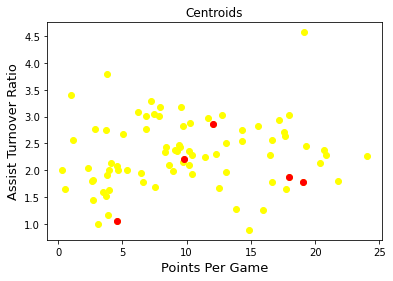

In [11]:
plt.scatter(point_guards['ppg'], point_guards['atr'], c='yellow')
plt.scatter(centroids['ppg'], centroids['atr'], c='red')
plt.title("Centroids")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()

### Setup 
While the centroids data frame object worked well for the initial centroids, where the centroids were just a subset of players, as we iterate the centroids' values will be coordinates that may not match another player's coordinates. Moving forward, let's use a dictionary object instead to represent the centroids.
We will need a unique identifier, like `cluster_id`, to refer to each cluster's centroid and a list representation of the centroid's coordinates (or values for `ppg` and `atr`). Let's create a dictionary then with the following mapping:

`key`: `cluster_id` of that centroid's cluster
`value`: centroid's coordinates expressed as a list ( `ppg` value first, `atr` value second )

To generate the cluster_ids, let's iterate through each centroid and assign an integer from 0 to k-1. For example, the first centroid will have a cluster_id of 0, while the second one will have a cluster_id of 1. We'll write a function, centroids_to_dict, that takes in the centroids data frame object, creates a cluster_id and converts the ppg and atr values for that centroid into a list of coordinates, and adds both the cluster_id and coordinates_list into the dictionary that's returned.

In [12]:
def centroids_to_dict(centroids):
    dictionary = dict()
    # iterating counter we use to generate a cluster_id
    counter = 0

    # iterate a pandas data frame row-wise using .iterrows()
    for index, row in centroids.iterrows():
        coordinates = [row['ppg'], row['atr']]
        dictionary[counter] = coordinates
        counter += 1

    return dictionary

centroids_dict = centroids_to_dict(centroids)

In [13]:
centroids_dict

{0: [17.930555555555557, 1.872340425531915],
 1: [9.808219178082192, 2.2037037037037037],
 2: [19.024390243902438, 1.7840909090909092],
 3: [12.058823529411764, 2.8674698795180724],
 4: [4.590909090909091, 1.0476190476190477]}

### Step-1: Eucledian Distance
Before we can assign players to clusters, we need a way to compare the `ppg` and `atr` values of the players with each cluster's centroids. Euclidean distance is the most common technique used in data science for measuring distance between vectors and works extremely well in 2 and 3 dimensions. While in higher dimensions, Euclidean distance can be misleading, in 2 dimensions Euclidean distance is essentially the Pythagorean theorem.
$$\sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_n-p_n)^2}$$

q and p are the 2 vectors we are comparing. If q is [5, 2] and p is [3, 1], the distance comes out to:
$$\sqrt{(5-3)^2 + (2-1)^2} = \sqrt{5} = ~2.23607$$

Let's create the function `calculate_distance`, which takes in 2 lists (the player's values for `ppg` and `atr` and the centroid's values for `ppg` and `atr`).

In [14]:
import math

def calculate_distance(centroid, player_values):
    root_distance = 0
    
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_difference = difference**2
        root_distance += squared_difference

    euclid_distance = math.sqrt(root_distance)
    return euclid_distance

q = [5, 2]
p = [3,1]

# Sqrt(5) = ~2.24
print(calculate_distance(q, p))

2.23606797749979


#### Assign Datappoints to Clusters
Now we need a way to assign data points to clusters based on Euclidean distance. Instead of creating a new variable or data structure to house the clusters, let's keep things simple and just add a column to the point_guards data frame that contains the cluster_id of the cluster it belongs to.

**Exercise**
Create a function that can be applied to every row in the data set (using the apply function in pandas).

- For each player, we want to calculate the distances to each cluster's centroid using `euclidean_distance`.
- Once we know the distances, we can determine which centroid is the closest (has the lowest distance) and return that centroid's `cluster_id`.
- Create a new column, `cluster`, that contains the row-wise results of `assign_to_cluster`.

In [15]:
# Add the function, `assign_to_cluster`
# This creates the column, `cluster`, by applying assign_to_cluster row-by-row

def assign_to_cluster(row):
    lowest_distance = -1
    closest_cluster = -1
    
    for cluster_id, centroid in centroids_dict.items():
        df_row = [row['ppg'], row['atr']]
        euclidean_distance = calculate_distance(centroid, df_row)
        
        if lowest_distance == -1: # First if statement sets lowest distance to player's euclidean distance
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id 
        elif euclidean_distance < lowest_distance: # elif statement resets lowest distance to player's euclidean distance if less than previous distance
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id
    return closest_cluster

point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)

### Visualize Clusters

We will write a function, `visualize_clusters`, that we can use to visualize the clusters easily.

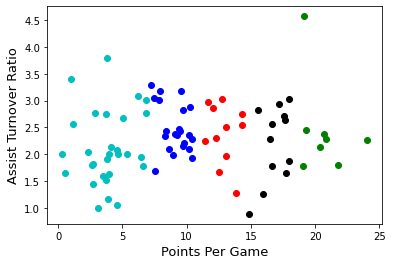

In [16]:
# Visualizing clusters
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['ppg'], clustered_df['atr'], c=colors[n-1])
        plt.xlabel('Points Per Game', fontsize=13)
        plt.ylabel('Assist Turnover Ratio', fontsize=13)
    plt.show()

visualize_clusters(point_guards, 5)

### Step-2: Recalculate Centroids for all Clusters (based on mean)

Write a function `recalculate_centroids`, that:
- takes in `point_guards`,
- uses each `cluster_id`(from 0 to num_clusters - 1) to pull out all of the players in each cluster,
- calculates the new arithmetic mean,
- and adds the `cluster_id` and the new arithmetic mean to `new_centroids_dict`, the final dictionary to be returned.

In [17]:
def recalculate_centroids(df, num_clusters):
    new_centroids_dict = dict()
    
    for cluster_id in range(0, num_clusters): 
        values_in_cluster = df[df['cluster'] == cluster_id]
        # Calculate new centroid using mean of values in the cluster
        new_centroid = [np.average(values_in_cluster['ppg']), np.average(values_in_cluster['atr'])]
        new_centroids_dict[cluster_id] = new_centroid
    return new_centroids_dict



In [18]:
centroids_dict = recalculate_centroids(point_guards, 5)
centroids_dict

{0: [16.847653133027922, 2.2041491935305344],
 1: [9.07713231567399, 2.483093276518812],
 2: [20.634057008119008, 2.4558021154262044],
 3: [12.851510593612359, 2.37482190856395],
 4: [3.824757946368799, 2.116084621432048]}

### Repeat Step-1 (assign_to_cluster)

Now that we recalculated the centroids, we'll re-run Step 1 (`assign_to_cluster`) and see how the clusters shifted.

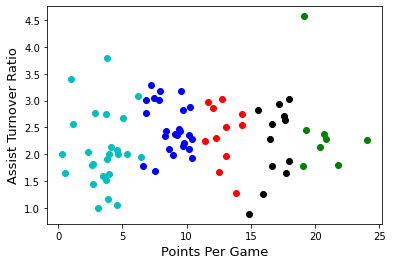

In [19]:
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

### Repeat Step-2 and Step-1
Now we need to recalculate the centroids, and shift the clusters again.

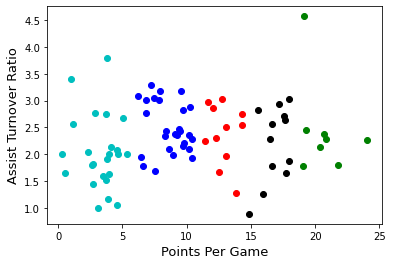

In [20]:
centroids_dict = recalculate_centroids(point_guards, 5)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, 5)

### Conclusion - Challenges of K-means
As we repeat Steps 1 and 2 and run `visualize_clusters`, we'll notice that a few of the points are changing clusters between every iteration (especially in areas where 2 clusters almost overlap), but otherwise, the clusters visually look like they don't move a lot after every iteration. This means 2 things:

- K-Means doesn't cause massive changes in the makeup of clusters between iterations, meaning that it will always converge and become stable
- Because K-Means is conservative between iterations, where we pick the initial centroids and how we assign the players to clusters initially matters a lot

To counteract these problems, the sklearn implementation of K-Means does some intelligent things like re-running the entire clustering process lots of times with random initial centroids so the final results are a little less biased on one passthrough's initial centroids.

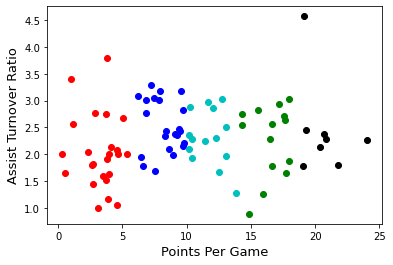

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(point_guards[['ppg', 'atr']])
point_guards['cluster'] = kmeans.labels_

visualize_clusters(point_guards, num_clusters)